In [0]:
# PERCEPTRON AND ADALINE
# https://www.youtube.com/watch?v=XsVkLAGwl-A
# https://github.com/minsuk-heo/deeplearning/blob/master/src/single_neuron_perceptron.ipynb

# https://www.kaggle.com/nikhil04/intro-to-perceptron-and-adaline-linear-neuron

# ADALINE:
# https://www.quora.com/Artificial-Neural-Networks-what-is-the-difference-between-perceptron-and-adaline-in-recognition-+-and-X-images
# good explanation of the math:
# https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
# https://medium.com/@benjamindavidfraser/understanding-basic-machine-learning-with-python-perceptrons-and-artificial-neurons-dfae8fe61700
# http://www.cs.cmu.edu/~bhiksha/courses/deeplearning/Spring.2018/www/slides/lec3.learning.pdf
# 

# FEATURE SCALING:
# https://www.bogotobogo.com/python/scikit-learn/Single-Layer-Neural-Network-Adaptive-Linear-Neuron.php

# WIDROW-HOFF:
# https://www.cs.princeton.edu/courses/archive/spring13/cos511/scribe_notes/0411.pdf

# SGD:
# http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline/

# FEATURE SCALING:
# but it also often leads to faster convergence and can prevent the weights from becoming too small (numerical stability).
# https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/
# https://stats.stackexchange.com/questions/367333/what-are-the-benefits-of-feature-scaling
# https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e
# https://stackoverflow.com/questions/26225344/why-feature-scaling
# https://www.quora.com/When-should-you-perform-feature-scaling-and-mean-normalization-on-the-given-data-What-are-the-advantages-of-these-techniques

# SCIKIT_LEARN
# http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/04-1_Perceptron_Adaline/04-1_Perceptron_Adaline.html

## **FT_SOMMELIER**

Given only chemical attributes of a red wine, be able to classify that wine as a ‘good wine’ or a ‘bad wine’.

Marvin has also included a “Quality” parameter

In [0]:
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # used to create png image files

In [3]:
from google.colab import drive
drive.mount('/content/drive')
wine_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/winequality-red.csv", sep=';')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


V.1
a)

Write a function that will plot a scatterplot matrix of your red wine data. Your function should plot wines with quality over some “good_threshold” as one color, and wines below some “bad_threshold” as another. Your plotting function should have the option to save a .png of your plots.

Don’t use the scatter_matrix() method in pandas.plotting!



In [0]:
# scatter_matrix() of panda.plotting is easier !

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):

    num_samples, num_features = wine_data.shape
    fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15,15))
    # remove spaces between grids
    fig.subplots_adjust(hspace=0, wspace=0) 
    # setting axes invisible
    # https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do
    for ax in axes.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    # get column names, total 12
    feature_names = wine_data.columns
    # https://www.geeksforgeeks.org/enumerate-in-python/
    # to add features into the diagonal entries
    for i, label in enumerate(feature_names):
        axes[i, i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                            ha='center', va='center')
    # filter good and bad wines
    good_wines = wine_data[(wine_data['quality'] > good_threshold)]
    bad_wines = wine_data[(wine_data['quality'] < bad_threshold)]
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
    for i in range(num_features):
        for j in range(i + 1, num_features):
            axes[i, j].scatter(good_wines.iloc[:, j], good_wines.iloc[:, i], c=['g'], marker='.')
            axes[i, j].scatter(bad_wines.iloc[:, j], bad_wines.iloc[:, i], c=['r'], marker='.')
            axes[j, i].scatter(good_wines.iloc[:, i], good_wines.iloc[:, j], c=['g'], marker='.')
            axes[j, i].scatter(bad_wines.iloc[:, i], bad_wines.iloc[:, j], c=['r'], marker='.')
    if save_plot:
        plt.savefig('/content/drive/My Drive/Colab Notebooks/scatterplot-matrix.png')
    return fig

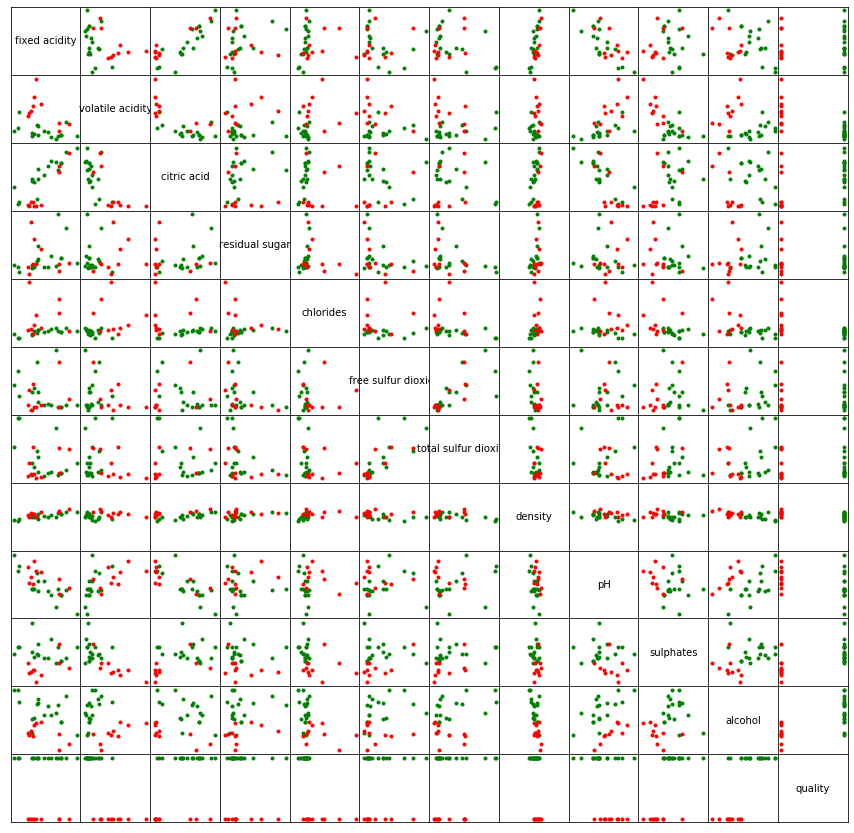

In [6]:
good_thresh = 7
bad_thresh = 4
fig = plot_scatter_matrix(wine_data, good_thresh, bad_thresh, True)
plt.show(fig)

V.1
b)

Now that you’ve had a chance to analyze different chemical factors in red wines and their relationship with high scores (8 or higher) and low scores (3 or lower), which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?

Given that perceptron is a linear model, good candidates are those with high characteristics for linear separability.  
Good candidates are: alcohol, pH, volatile acidity and sulphate.  
Bad candidates are density and chlorides.

Extra Notes:

http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline/

The closed-form solution should be preferred for "smaller" datasets where calculating (a "costly") matrix inverse is not a concern. For very large datasets, or datasets where the inverse of [XTX] may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity), the gradient descent or stochastic gradient descent approaches are to be preferred.

